Regresion lineal

In [3]:
import scipy as sp
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pylab as plt
%matplotlib inline


In [4]:
data=pd.read_csv("ventas.csv",index_col=0)

In [5]:
data.head()

,TV,Radio,Periodico,Ventas
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Analisis exploratorio

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Periodico    200 non-null float64
Ventas       200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
data.describe()

,TV,Radio,Periodico,Ventas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [22]:
cx=['TV']
cy=['Ventas']

Con una sola característica

In [25]:
x=data[cx[0]]
y=data[cy[0]]

In [18]:
cm = np.corrcoef(data.values.T)
cm

array([[ 1.        ,  0.05480866,  0.05664787,  0.78222442],
       [ 0.05480866,  1.        ,  0.35410375,  0.57622257],
       [ 0.05664787,  0.35410375,  1.        ,  0.22829903],
       [ 0.78222442,  0.57622257,  0.22829903,  1.        ]])

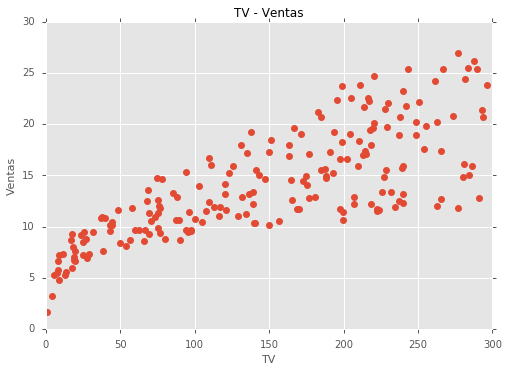

In [91]:
plt.style.use('seaborn-notebook')
plt.plot(x, y,'o')
plt.xlabel('TV')
plt.ylabel('Ventas')
plt.title('TV - Ventas')

In [33]:
print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'seaborn-muted', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'classic', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [42]:
from scipy import stats

In [53]:
#fp1,residuals,rank,sv,rcond = sp.polyfit(x, y, 1, full=True)

In [92]:
x=np.array(x)
y=np.array(y)

[stats.linregress](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html)

In [93]:
pendiente,intercepto,r,p,err_st=stats.linregress(x,y)

In [94]:
print [pendiente,intercepto]

[0.047536640433019743, 7.0325935491276956]


In [96]:
def f(x):
    return x*pendiente+intercepto

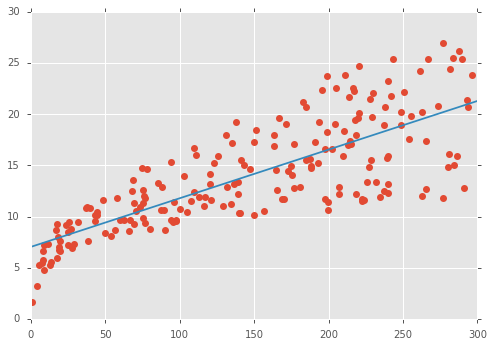

In [104]:
xp = np.linspace(0,300,300)
plt.plot(x, y, 'o',xp, f(xp),'-')
plt.show()

In [107]:
print r**2

0.61187505085


In [108]:
f(200)

16.539921635731645

In [19]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [20]:
lr=LinearRegressionGD()

In [26]:
lr.fit(x,y)

IndexError: tuple index out of range